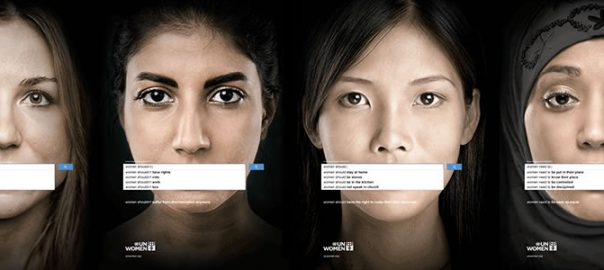

# Exploring the Justification of Violence Against Women - A Visual Exploration

**Importing and cleansing the data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from textwrap import wrap

In [5]:
filename = "/content/drive/MyDrive/DSDojo/PandasForDataManipulation/20200306 Data International Women's Day Viz5 Launch.csv"
df = pd.read_csv(filename)

In [ ]:
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [ ]:
df[df['Value'].isna()]['Demographics Response'].unique()

array(['Never married', 'No education', 'Primary', '15-24', '25-34',
       '35-49', 'Higher', 'Secondary', 'Employed for cash',
       'Employed for kind', 'Unemployed', 'Married or living together',
       'Widowed, divorced, separated', 'Rural', 'Urban'], dtype=object)

In [6]:
df['Year'] = pd.DatetimeIndex(df['Survey Year']).year
df.drop(columns = 'Survey Year', inplace = True)
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Value,Year
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,NaN,2015
1,1,Afghanistan,F,Education,Higher,... if she burns the food,10.1,2015
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,13.7,2015
3,1,Afghanistan,F,Education,Primary,... if she burns the food,13.8,2015
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8,2015
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,11.8,2015
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,20.1,2015
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,15.0,2015
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,7.2,2015


In [ ]:
FemaleAgree = df[df['Gender']=='F'].groupby(['Year'])['Value'].mean()
FemaleAgree['Yeartest'] =  FemaleAgree.index
FemaleAgree

Year
2000                                                    36.19
2001                                                  6.61889
2002                                                  46.1867
2003                                                  45.2133
2005                                                  10.5595
2006                                                  21.4606
2007                                                   1.5859
2008                                                  11.6542
2009                                                  7.98111
2010                                                  23.7944
2011                                                  24.1524
2012                                                  21.6279
2013                                                  24.8785
2014                                                  22.6174
2015                                                  19.4898
2016                                                  25.4583
201

**Visualizing the Data**

[None, None, None, None]

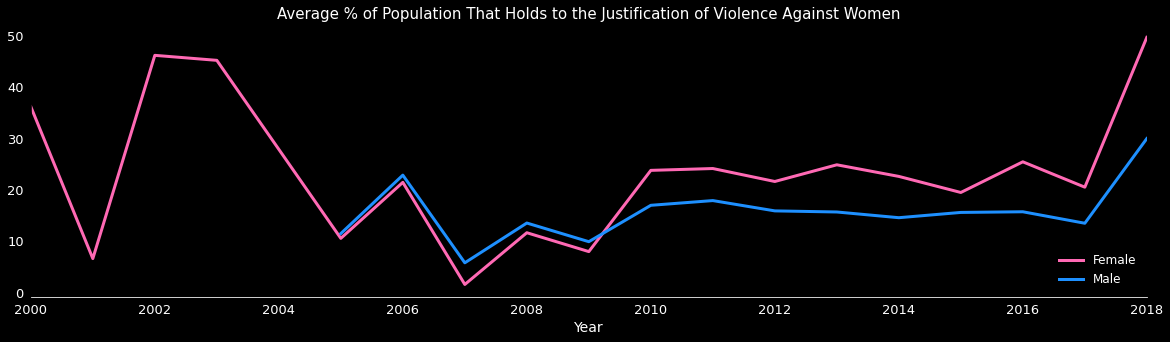

In [5]:
# lets first try visualize without handling nulls
#Average % of demographic groups that Agree That violence against women is justified, by sex
FemaleAgree = df[df['Gender']=='F'].groupby(['Year'])['Value'].mean()
MaleAgree = df[df['Gender']=='M'].groupby(['Year'])['Value'].mean()
#sns.set_theme()
#plt.style.use('dark_background')
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(20,5))
plt.xticks(fontsize = 13,c = 'w')
plt.yticks(fontsize = 13, c = 'w')
graphic = plt.gca()
fig.set_facecolor('k')
axes.set_facecolor('k')
plt.xlim(2000,2018)
plt.xlabel("Year",c = 'w', fontsize = 14)
axes.spines["bottom"].set_color('w')
axes.spines["right"].set_color('k')
axes.spines["top"].set_color('k')
#plt.ylabel("Demographic Percent",c = 'w')
plt.title("Average % of Population That Holds to the Justification of Violence Against Women",c = 'w', fontsize = 15)
axes.plot(FemaleAgree.index,FemaleAgree.values, label = 'Female', c= 'hotpink', linewidth = 3)
axes.plot(MaleAgree.index,MaleAgree.values, label = 'Male', c= 'dodgerblue', linewidth = 3)
legend = axes.legend(loc= "lower right", facecolor = "k", framealpha = 0, fontsize = 12)
axes.grid(False)
plt.setp(legend.get_texts(), color = 'w')
#plt.savefig('/content/drive/MyDrive/DSDojo/PandasForDataManipulation/results.png', dpi = 300)

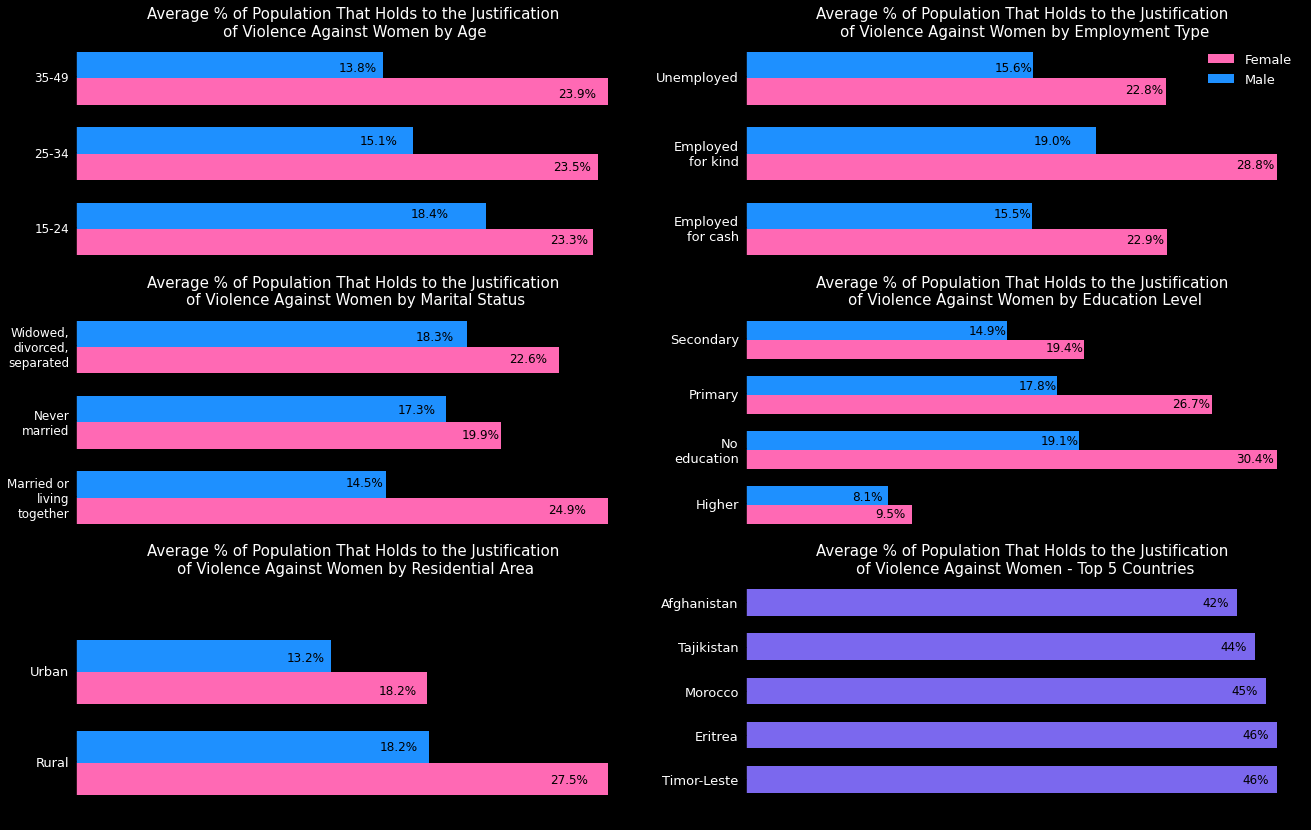

In [204]:
Nage=3
#NAge= 3
widthOverall = 0.35
indAge = np.arange(Nage)
FemaleAgreeAge = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Age')].groupby(['Demographics Response'])['Value'].mean()
MaleAgreeAge = df[(df['Gender']=='M') & (df['Demographics Question'] == 'Age')].groupby(['Demographics Response'])['Value'].mean()
figOverall, axAgreeAge = plt.subplots(nrows = 3, ncols=2, figsize = (22,14))
axAgreeAge[0,0].barh(FemaleAgreeAge.index,FemaleAgreeAge.values,widthOverall,label = 'Female',color= 'hotpink')
axAgreeAge[0,0].barh(indAge + widthOverall ,MaleAgreeAge.values,widthOverall, label = 'Male', color= 'dodgerblue')
axAgreeAge[0,0].set_title("Average % of Population That Holds to the Justification \nof Violence Against Women by Age",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
axAgreeAge[0,0].set_yticklabels(FemaleAgreeAge.index, color = 'w',fontsize = 12)
axAgreeAge[0,0].set_yticks([0.2,1.2,2.2])
axAgreeAge[0,0].set_facecolor('k')
figOverall.set_facecolor('k')
plt.xticks(c='k')
#axAgreeAge[0,0].set_ylabel('Age', c = 'w', fontsize = 14)
xAgeList = tuple(FemaleAgreeAge.index)
for index, value in enumerate(FemaleAgreeAge.values):
    plt.text(value-40.25,index*1.65 + 12.2,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
for iindex, vvalue in enumerate(MaleAgreeAge.values):
    plt.text(vvalue*1.35 -54,iindex*1.65 + 12.78,str(np.round(vvalue,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------
#For Employment
Nage=3
#NAge= 3
widthOverall = 0.35
indAge = np.arange(Nage)
FemaleAgreeEmp = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Employment')].groupby(['Demographics Response'])['Value'].mean()
MaleAgreeEmp = df[(df['Gender']=='M') & (df['Demographics Question'] == 'Employment')].groupby(['Demographics Response'])['Value'].mean()
axAgreeAge[0,1].barh(FemaleAgreeEmp.index,FemaleAgreeEmp.values,widthOverall, label = 'Female',color= 'hotpink')
axAgreeAge[0,1].barh(indAge + widthOverall,MaleAgreeEmp.values,widthOverall, label = 'Male', color= 'dodgerblue')
axAgreeAge[0,1].set_title("Average % of Population That Holds to the Justification \nof Violence Against Women by Employment Type",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
labelsemp = [ '\n'.join(wrap(l, 10)) for l in FemaleAgreeEmp.index ]
axAgreeAge[0,1].set_yticklabels(labelsemp, color = 'w',fontsize = 13)
axAgreeAge[0,1].set_yticks([0.2,1.2,2.2])
axAgreeAge[0,1].set_facecolor('k')
figOverall.set_facecolor('k')
#axAgreeAge[0,1].set_ylabel('Employment Type', c = 'w', fontsize = 14)
plt.xticks(c='k')
xEmpList = tuple(FemaleAgreeEmp.index)
for index, value in enumerate(FemaleAgreeEmp.values):
    plt.text(value*1.6 -3.5 ,index*1.7 +12.2,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
for iindex, vvalue in enumerate(MaleAgreeEmp.values):
    plt.text(vvalue +6,iindex*1.65 + 12.78,str(np.round(vvalue,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
legend = axAgreeAge[0,1].legend(loc='best', facecolor = "k", framealpha = 0, fontsize = 13)
plt.setp(legend.get_texts(), color = 'w')
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
#For Marital Status
Nage=3
#NAge= 3
widthOverall = 0.35
indAge = np.arange(Nage)
FemaleAgreeMar = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Marital status')].groupby(['Demographics Response'])['Value'].mean()
MaleAgreeMar = df[(df['Gender']=='M') & (df['Demographics Question'] == 'Marital status')].groupby(['Demographics Response'])['Value'].mean()
axAgreeAge[1,0].barh(FemaleAgreeMar.index,FemaleAgreeMar.values,widthOverall,label = 'Female',color= 'hotpink')
axAgreeAge[1,0].barh(indAge + widthOverall ,MaleAgreeMar.values,widthOverall, label = 'Male', color= 'dodgerblue')
axAgreeAge[1,0].set_title("Average % of Population That Holds to the Justification \nof Violence Against Women by Marital Status",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
labelsMar = [ '\n'.join(wrap(l, 10)) for l in FemaleAgreeMar.index ]
axAgreeAge[1,0].set_yticklabels(labelsMar, color = 'w',fontsize = 12, wrap = True)
axAgreeAge[1,0].set_yticks([0.2,1.2,2.2])
axAgreeAge[1,0].set_facecolor('k')
figOverall.set_facecolor('k')
plt.xticks(c='k')
#axAgreeAge[1,0].set_ylabel('Age', c = 'w', fontsize = 14)
xAgeList = tuple(FemaleAgreeMar.index)
for index, value in enumerate(FemaleAgreeMar.values):
    plt.text(value*1.5 -54.5,index*1.7 + 6.1,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
for iindex, vvalue in enumerate(MaleAgreeMar.values):
    plt.text(vvalue*1.6 -58,iindex*1.65 + 6.7,str(np.round(vvalue,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------
#For Education
Nage=4
#NAge= 3
widthOverall = 0.35
indAge = np.arange(Nage)
FemaleAgreeEdu = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Education')].groupby(['Demographics Response'])['Value'].mean()
MaleAgreeEdu = df[(df['Gender']=='M') & (df['Demographics Question'] == 'Education')].groupby(['Demographics Response'])['Value'].mean()
axAgreeAge[1,1].barh(FemaleAgreeEdu.index,FemaleAgreeEdu.values,widthOverall, label = 'Female',color= 'hotpink')
axAgreeAge[1,1].barh(indAge + widthOverall,MaleAgreeEdu.values,widthOverall, label = 'Male', color= 'dodgerblue')
axAgreeAge[1,1].set_title("Average % of Population That Holds to the Justification \nof Violence Against Women by Education Level",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
labelsEdu = [ '\n'.join(wrap(l, 10)) for l in FemaleAgreeEdu.index ]
axAgreeAge[1,1].set_yticklabels(labelsEdu, color = 'w',fontsize = 13,wrap = True)
axAgreeAge[1,1].set_yticks([0.2,1.2,2.2,3.2])
axAgreeAge[1,1].set_facecolor('k')
figOverall.set_facecolor('k')
#axAgreeAge[1,1].set_ylabel('Employment Type', c = 'w', fontsize = 14)
plt.xticks(c='k')
for index, value in enumerate(FemaleAgreeEdu.values):
    plt.text(value*1.5 -3 ,index*1.25 + 6,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
for iindex, vvalue in enumerate(MaleAgreeEdu.values):
    plt.text(vvalue*1.5 - 3,iindex*1.25 + 6.4,str(np.round(vvalue,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)

plt.setp(legend.get_texts(), color = 'w')
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
#For Residence
Nage=2
#NAge= 3
widthOverall = 0.35
indAge = np.arange(Nage)
FemaleAgreeRes = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Residence')].groupby(['Demographics Response'])['Value'].mean()
MaleAgreeRes= df[(df['Gender']=='M') & (df['Demographics Question'] == 'Residence')].groupby(['Demographics Response'])['Value'].mean()
axAgreeAge[2,0].barh(FemaleAgreeRes.index,FemaleAgreeRes.values,widthOverall, label = 'Female',color= 'hotpink')
axAgreeAge[2,0].barh(indAge + widthOverall,MaleAgreeRes.values,widthOverall, label = 'Male', color= 'dodgerblue')
axAgreeAge[2,0].set_title("Average % of Population That Holds to the Justification \nof Violence Against Women by Residential Area",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
labelsRes = [ '\n'.join(wrap(l, 10)) for l in FemaleAgreeRes.index ]
axAgreeAge[2,0].set_yticklabels(labelsRes, color = 'w',fontsize = 13,wrap = True)
axAgreeAge[2,0].set_yticks([0.2,1.2,2.2])
axAgreeAge[2,0].set_facecolor('k')
figOverall.set_facecolor('k')
#axAgreeAge[1,1].set_ylabel('Employment Type', c = 'w', fontsize = 14)
plt.xticks(c='k')

for index, value in enumerate(FemaleAgreeRes.values):
    plt.text(value*1.6-61,index*2,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
for iindex, vvalue in enumerate(MaleAgreeRes.values):
    plt.text(vvalue*1.6 -61,iindex*2 + 0.75,str(np.round(vvalue,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)


#--------------------------------------------------------------------------------------------------------------------------------------------------------------
#For Top countries
dftop = (df.groupby(['Country'])[['Value']].mean())
dftop5 = dftop.sort_values(by = ['Value'], ascending = False).head(5)
Nage=5
# #NAge= 3
widthOverall = 0.6
indAge = np.arange(Nage)
axAgreeAge[2,1].barh(dftop5.index,dftop5['Value'],widthOverall, label = 'Female',color= 'mediumslateblue')
axAgreeAge[2,1].set_title("Average % of Population That Holds to the Justification \nof Violence Against Women - Top 5 Countries",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
labels5 = [ '\n'.join(wrap(l, 12)) for l in dftop5.index ]
axAgreeAge[2,1].set_yticklabels(labels5, color = 'w',fontsize = 13,wrap = True)
axAgreeAge[2,1].set_yticks([0,1,2,3,4])
axAgreeAge[2,1].set_facecolor('k')
figOverall.set_facecolor('k')
#axAgreeAge[2,1].set_ylabel('Employment Type', c = 'w', fontsize = 14)
plt.xticks(c='k')
# # plt.xlim(0,30)
# #xEmpList = tuple(FemaleAgreeEmp.index)
for index, value in enumerate(dftop5.values):
    plt.text(value-3,index,str(np.round(int(value),1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)


# **Observations**


*   People in rural areas are more likely to justify violence against women
*   People under the age of 24 are more likely to justify violence against women
*   The lower the level of education a person has, the more likely they are to justify violence against women
*   People 'employed for kind' are more likely to justify violence against women
*   Almost half the people surveyed in Afghanistan, Tajikistan, Morocco, Eritrea and Timor-Leste find at least one reason to justify violence against women
*   From 2000-2005 There was no difference between the % of males and female who justified violence against women
*   From 2005-2009 Males were more likely to justify violence against women than women were. 
*   From 2009 onwards women were more likely to justify violence against women

#**Conclusions**
* It's highly unlikely that for the 5 years the survey was conducted that both males and females gave exactly the same responses. Possible answers to this phenomenon may be that women might have been surveyed with men in the room, or if they were surveyed via letter or the internet, that a male family member filled out the survey instead. Investigation should be done into the surveying techniques employed for the first 5 years and how they differed starting in 2006.
* Surprisingly, women appear more likely to justify violence against themselves than their male counterparts. In not one category (overall) did the male group score higher than the females. Could this be due to the brainwashing of females from a young age to accept their lot, to an extent that exceeds what even the males themselves deem necessary
* Another interesting finding was that within married couples, the males were less likely to justify violence against women, but the women were far more liekly to justify it than their single, divorced or widowed counterparts.
* Not surprising is that those who live in urban areas and have a higher education were LESS likely to justify violence against women.
* Though the percentage of populations that justified violence against women had dropped to almost half of what it was in ~2002, we see an unpresedented spike in population that now agrees with it in the last few years (specifically in women) to the extent that the latest statistics show that the % of the population that agree with violence against women has now reached an all time high, exceeding that of 2002.





In [205]:
# extra code --- ignore
#-------------------------------------------------------------------------------------------------------------------
# lets first try visualize without handling nulls

#Overall
# N=5
# NOverall= 3
# widthOverall = 0.35
# ind = np.arange(N)
# FemaleAgreeOverall = df[(df['Gender']=='F')].groupby(['Demographics Question'])['Value'].mean()
# MaleAgreeOverall = df[(df['Gender']=='M')].groupby(['Demographics Question'])['Value'].mean()
# figOverall, axAgreeOverall = plt.subplots(3,2, figsize = (12,6))
# axAgreeOverall[0].barh(ind,FemaleAgreeOverall.values,widthOverall, label = 'Female',color= 'hotpink')
# axAgreeOverall[0].barh(ind + widthOverall ,MaleAgreeOverall.values,widthOverall, label = 'Male', color= 'dodgerblue')

# # plt.xticks(fontsize = 13,c = 'w')
# # plt.yticks(fontsize = 13, c = 'w')
# # axAgreeOverall.set_facecolor('k')
# # plt.barh(ind,FemaleAgreeOverall.values,widthOverall, label = 'Female',color= 'hotpink')
# # plt.barh(ind + widthOverall ,MaleAgreeOverall.values,widthOverall, label = 'Male', color= 'dodgerblue')
# xOverallList = tuple(FemaleAgreeOverall.index)
# plt.yticks(ind + widthOverall/2 ,xOverallList)
# for index, value in enumerate(FemaleAgreeOverall.values):
#     plt.text(value,index,str(np.round(value,1)))

